<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset Description</a></span></li><li><span><a href="#Metadata-Description" data-toc-modified-id="Metadata-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Metadata Description</a></span></li><li><span><a href="#PCA-and-Clustering" data-toc-modified-id="PCA-and-Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PCA and Clustering</a></span><ul class="toc-item"><li><span><a href="#Data-Filtering" data-toc-modified-id="Data-Filtering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Filtering</a></span></li></ul></li><li><span><a href="#Cluster-Data" data-toc-modified-id="Cluster-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster Data</a></span><ul class="toc-item"><li><span><a href="#K-means-Clustering" data-toc-modified-id="K-means-Clustering-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>K-means Clustering</a></span></li><li><span><a href="#Agglomerative-Clustering" data-toc-modified-id="Agglomerative-Clustering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Agglomerative Clustering</a></span></li><li><span><a href="#DBSCANS" data-toc-modified-id="DBSCANS-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>DBSCANS</a></span></li><li><span><a href="#Plot-PCA" data-toc-modified-id="Plot-PCA-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Plot PCA</a></span></li><li><span><a href="#Display-Clusters" data-toc-modified-id="Display-Clusters-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Display Clusters</a></span></li></ul></li><li><span><a href="#Final-Project-Proposal" data-toc-modified-id="Final-Project-Proposal-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Project Proposal</a></span></li><li><span><a href="#Run-ICA" data-toc-modified-id="Run-ICA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Run ICA</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from scipy.sparse import csr_matrix
from matplotlib.lines import Line2D

In [2]:
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Dataset Description

<span style="color:red">What is it, why was it generated, and what questions can it hopefully answer?</span>

a. The data is collected from different types of processed kidney tissues that provide insight to cell-type specific gene expression as well as further understand the organization of function and disease. Profiling the kidney data can help determine the connection between defects and numerous kidneys associated diseases such as chronic kidney disease, end-stage renal disease, diabetes, and hypertension. Certain genes can be determined from the cell types to provide a potential target to fight some of the previously mentioned diseases. 

<span style="color:red">What is/are the data type(s) (RNA sequencing, proteomics, etc)? Are there important assumptions with this type of data?</span>

b. The data types come from isolating nuclei for RNA-sequencing. They are specifically assessed using snDrop-seq. Only the nuclei from cryosectioned frozen tissues and dissociated fresh tissues were able to be used with snDrop-seq. The use of snDrop-seq allows for greater resolution of the nephric cell-types as well as subtypes which allow more accurate cluster resolution to represent the compositions. Examination of the clusters for a source of bias, medullary clusters were associated with loop of Henle (LOH) and collecting ducts (CD) of only 3 of the 15 individuals from which the samples were procured. The cortical clusters were observed in 14 out of the 15 individuals with negligible batch effects. A certain proximal tubules (PT) cluster was derived from one individual, that is believed to be associated with an underlying disease or procedure. The general cortex data were fairly consistent amongst all of the experiments, with some slightly greater correlations than others between the individuals.

<span style="color:red">Has it been processed or pooled in any way? How will that affect analysis?</span>

c. After some quality control filtering, the 17,659 nuclei sequenced with a depth of an average of 1082 transcripts were determined to be among 30 cell clusters through PAGODA2. Quality control filtering included filtering for more than 400 nonmitochondrial transcripts, excluding transcripts that were detected in less than 3 cells, as well as utilizing the gene/unique molecular identifier (UMI) to remove the low quality nuclei. A variety of clustering parameters were tested to confirm the clustering assignments. Poor clustering of less than 30 were excluded. To examine the effect of the different tissue processing methods used, the average expression values were calculated for each condition for all of the data,  with the cortex and medulla data separated, as well as within specific cell clusters and individuals. The exclusion of the data that did not meet the criterias outlined above removed outliers and likely lowered the amount of clusters. 

<span style="color:red">What has been done with this data in the past? What were the main findings? What are the strengths and weaknesses of that analysis?</span>

d. The uniform manifold approximation and projection (UMAP) analysis provided a sequencing map to confirm the clustering of the regions. The main findings were the clustering, based on the possible tissue processing, collection, as well as patient-derived artifacts. UMAP plots were also used to show expression levels of S2 segment marker ACSM3 and Unk cluster 29 marker CFH as well as RNA expression levels with a scale of 25μm. They also provided a visualization of the high expressing cells. The data also was analyzed with Similarity Weighted Nonnegative Embedding (SWNE) to analyze the tubule clusters to provide a progression of lineages. SWNE incorporates visualization of local and global structure both developmental trajectories and discrete cell types. SWNE analysis demonstrated renal tubular data shows a spatial organization of tubular component nuclei progressing from PT, through the thin limb (TL) and thick ascending limb (TAL) to the distal convoluted tubule (DCT), indicating a continuum of gene expression progressing between the different nephron segments.


# Metadata Description

<span style="color:red">What do the sample labels mean/is there a metadata file similar to the homework’s “sample_table"?</span>

a. The formation of sample labels is “C(number)+N(number)+cell barcode”. For better illustration, I use a figure from “Drop­seq Core Computational Protocol”. So, every label is a single cell. C(number) means the cluster the sample cell belongs to, from C1 to C30. The annotation of each cluster can be seen in file “GSE121862_UCSD-WU_Single_Nuclei_Cluster_Annotations” and Supplementary data 5.

In [3]:
Supp_data5 = pd.read_excel('Supp_data5.xls',skiprows=4,usecols = range (1,7))
Supp_data5.head()


,Cluster,Abbn,Annotation,Broad Cell Type Markers,Cluster-Specific Markers,Pertinent Negatives
0,1,EPC,Epithelial Cells (unassigned),NaN,"SPATA22, CMC2, PAMR1",NaN
1,2,POD,Podocytes,"NPHS2, CLIC5, NPHS1",PLA2R1,NaN
2,3,PT-1,Proximal Tubule Epithelial Cells (S1/S2),"CUBN, LRP2, SLC13A1",SLC5A12,NaN
3,4,PT-2,Proximal Tubule Epithelial Cells (S2),"LRP2, SLC13A1","DLGAP1, ACSM3",NaN
4,5,PT-3,Proximal Tubule Epithelial Cells - Stress/Inflam,"CUBN, MIOX, GPX3","IL36B, SLC26A3",NaN


Each cluster is a kind of cell descripted in the research. N(number) means the library from which the cell came, from NK1 to NK94. Details such as treatment of the sample and the sample origin can be found in supplementary data 2 and 4. These supplementary tables is similar to the “sample in formation table” in our homework. Specifically, the table includes information about Tissue Treatment, Tissue Collection, Nuclei Extraction Protocol, and summary of sequencing result such as % Coding, % UTR, % Intronic, % Intergenic, % MT, Useful reads and UMI


In [4]:
Supp_data2 = pd.read_excel('filtered_metadata.xls',skiprows=4,usecols = range (1,32))
Supp_data2.head()

,Experiment,Library,Library Barcode,PPID,Specimen ID,Sample,Tissue Treatment,Tissue Treatment (Short),Tissue Collection (Short),Nuclei Extraction Protocol,...,% Coding,% UTR,% Intronic,% Intergenic,% MT,Post QC (>400 nonMT UMI; >400 <5000 nonMT Genes Detected).1,Used for Clustering Analysis,Useful reads,UMI,Duplication level
0,20161122,NK5,N705,3351,K1600543,K1600543_2,RNAlater 6 Hours,RNAlater,Nephrectomy,NEB/Dounce,...,8.84,3.59,48.93,38.64,0.476256,80.0,yes,181896.0,92994.0,0.488752
1,20171016A,NK9,N703,3395,K1700233,K1700233_8,"Flash Frozen, Cryosection (35umx7) OCT embedded",Cryosection,Nephrectomy,NEB/Dounce,...,24.09,3.79,39.66,32.47,17.1188,741.0,yes,1516531.0,753643.0,0.503048
2,20171016C,NK13,N705,3395,K1700233,K1700233_9,RNAlater 6 Hours,RNAlater,Nephrectomy,NEB/Dounce,...,20.06,2.41,46.48,31.06,4.35699,177.0,yes,275203.0,150365.0,0.453622
3,20171214D,NK21,N720,3432,K1700578,K1700578_12,60 minutes Trypsin-Collagenase,Trypsin-Collagenase,Nephrectomy,NEB/Dounce,...,60.45,8.89,23.44,7.22,24.9981,782.0,yes,1054658.0,738702.0,0.299581
4,20171214A,NK25,N706,3431,K1700572,K1700572_11,30 minutes Papain-Collagenase,Papian-Collagenase,Nephrectomy,NEB/Dounce,...,41.23,8.85,41.79,8.12,2.90748,350.0,yes,1684831.0,406276.0,0.758862


The third part of the sample labels, cell barcodes, basically represent each individual cell during sequencing. From the workflow figure we can see that each cell is assigned a cell barcode, based on that the reads are sorted into each cell.
 
There are 17659 cells in total, and from their labels, we can know the clusters they belong to and the sample information from relevant file according its library.


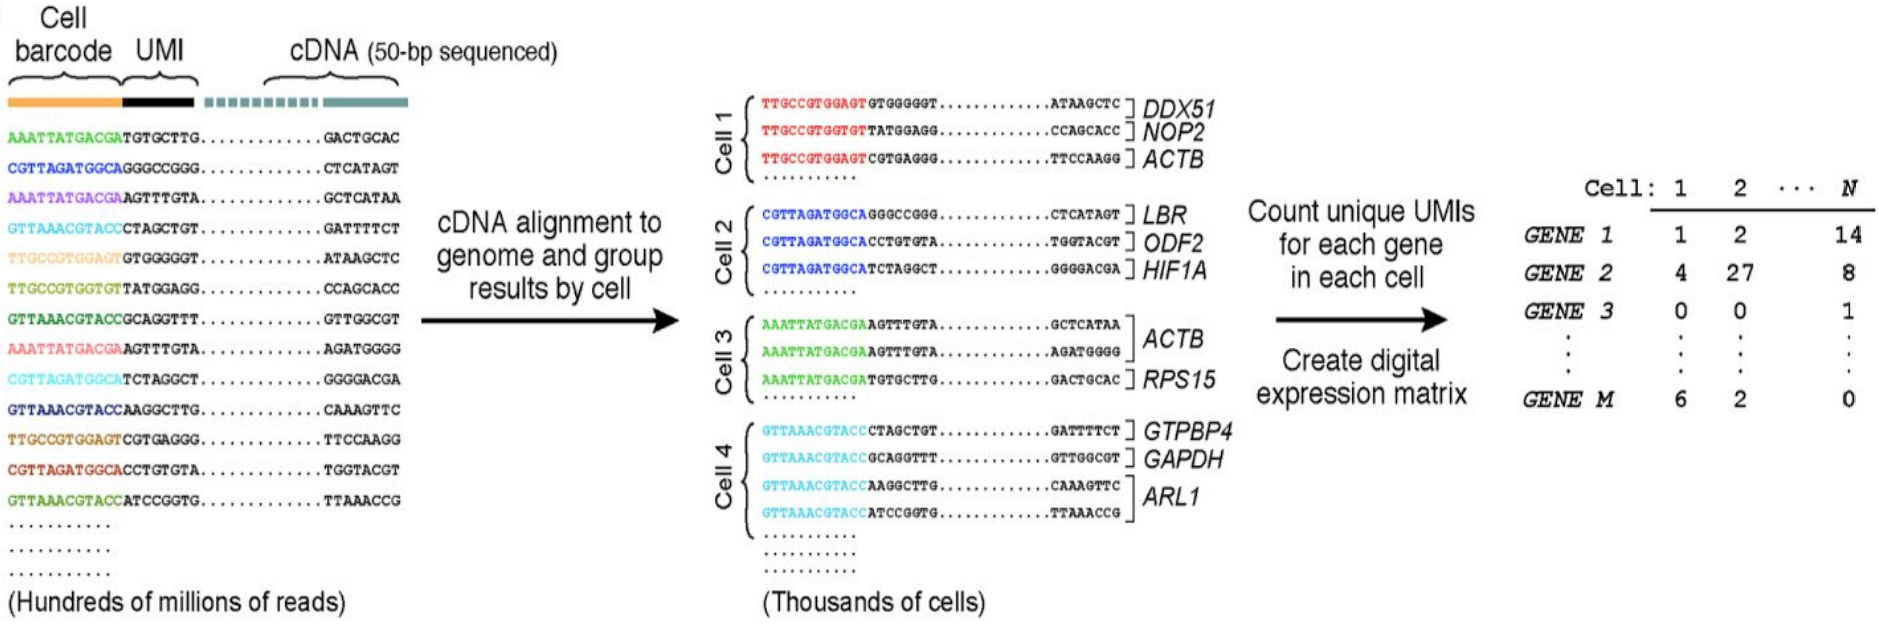

In [5]:
from IPython.display import Image
Image(filename='workflow.png') 

<span style="color:red">What do the other labels (gene, protein, metabolite, etc) mean? If you needed to look up more information about them, what database or website would you use?</span>

b. What do the other labels (gene, protein, metabolite, etc) mean? If you needed to look up more information about them, what database or website would you use?
In the raw data, each row label is a gene. The number is the UMI count of each gene’s read in each cell, similar to relative expression level. Thus, the raw data is very similar to our homework expression data. The row labels give us the name of genes directly, (even some unnamed genes) and I didn’t find files describing gene information, so we can search them directly on NCBI or www.genecards.org. The description on NCBI of most genes can be found, except some unclear genes, annotated as “protein family + location in genome” such as “ABC12-49244600F4.4”


<span style="color:red">Describe any other relevant files and specific external resources, too:</span>

1. GSE121862_UCSD-WU_Single_Nuclei_Cluster_Annotations.csv:
Summary of cluster Annotation. Cell type of each cluster is shown.
 
2. supplementary data 1
PPID and specimen ID of each sample metadata, as well as other information’s such as sex age, BMI, procedure type, and specimen composition.
 
3. supplementary data 2
Sample information table for each library. It includes many information about each library, such as library number, corresponding specimen ID, sample experimental treatment, tissue type and summary of data collected, etc.
 
4. supplementary data 3.
Summary of each sequencing experiments. Similar to but different from supplementary data 2. It is arranged for each sequencing experiment, not the library. Includes Specimen ID, Tissue Treatment ad collection, also some information about data quality such as # of Nuclei Expected, #>400UMI, %MT, etc.
 
5. supplementary data 4.
A more detailed sample information table. The table shows information about each barcode, in another word, each cell, such as which specimen and library the cell came from, the number of genes and number of UMIs, and corresponding experimental processing details.
 
6. supplementary data 5.
A more detailed cluster annotation table. For each cluster, it shows the annotation, broad cell type markers, cluster specific markers and reference markers.



# PCA and Clustering

In [6]:
# Data was filtered to preserve one sample type per experimental condition 
data = pd.read_csv("filtered_data.csv",index_col=0)

In [7]:
data

,C1_NK5_CCCGCTTCCTCC,C1_NK9_CCCCCCCATCCA,C1_NK9_CCCAGCCATCTT,C1_NK9_CGCCCCTTTCTT,C1_NK9_CCCCCATTTCCC,C1_NK9_CCTCATCGTTCA,C1_NK9_CTCCTCACACTC,C1_NK9_GTCCCAGTCTCA,C1_NK9_CCGTGCGATCTC,C1_NK9_CCCCAAATCCTC,...,C30_NK35_CAGGCGTAGTCG,C30_NK35_GAGCGTCTGAAG,C30_NK41_TGCCCGACTCAC,C30_NK41_ACTTACGGCATA,C30_NK41_GCCTACGGATTT,C30_NK41_AGAGGGCTGCTG,C30_NK44_AGTATTTACCGA,C30_NK44_TGCTATCTATAT,C30_NK55_ACACCTCCTTAC,C30_NK81_CTCTAAGACGGT
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZYG11B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ZYX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZZEF1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Filtering

This was run prior on the original dataset to obtain one sample from each metadata project. Not all metadata projects were found in the original dataset

In [8]:
"""labels = ["NK3_","NK5_","NK9_","NK13","NK18","NK20","NK21","NK24","NK25","NK27","NK29","NK31","NK35",
         "NK41","NK44","NK47","NK49","NK52","NK55","NK59","NK63","NK71","NK81"]
seen = []
filtered_data = pd.DataFrame(index=data.index)
for i,item in data.iteritems():
    for j in labels:
        if j in i:
            filtered_data[i] = item
            if j not in seen:
                print(j)
                seen.append(j)"""

'labels = ["NK3_","NK5_","NK9_","NK13","NK18","NK20","NK21","NK24","NK25","NK27","NK29","NK31","NK35",\n         "NK41","NK44","NK47","NK49","NK52","NK55","NK59","NK63","NK71","NK81"]\nseen = []\nfiltered_data = pd.DataFrame(index=data.index)\nfor i,item in data.iteritems():\n    for j in labels:\n        if j in i:\n            filtered_data[i] = item\n            if j not in seen:\n                print(j)\n                seen.append(j)'

In [9]:
#filtered_data.to_csv("filtered_data.csv")

# Cluster Data

## K-means Clustering

In [10]:
k_clusterer = cluster.KMeans(n_clusters=16).fit(data.transpose())

In [11]:
k_clusters = pd.Series(k_clusterer.labels_, index =data.columns)
k_clusters

C1_NK5_CCCGCTTCCTCC      4
C1_NK9_CCCCCCCATCCA      1
C1_NK9_CCCAGCCATCTT      1
C1_NK9_CGCCCCTTTCTT      1
C1_NK9_CCCCCATTTCCC      1
                        ..
C30_NK41_AGAGGGCTGCTG    1
C30_NK44_AGTATTTACCGA    1
C30_NK44_TGCTATCTATAT    1
C30_NK55_ACACCTCCTTAC    1
C30_NK81_CTCTAAGACGGT    1
Length: 5242, dtype: int32

## Agglomerative Clustering

In [12]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=16).fit(data.transpose())
agglomerative_clusters = pd.Series(agglomerative.labels_,index=data.columns)

In [13]:
agglomerative_clusters

C1_NK5_CCCGCTTCCTCC      13
C1_NK9_CCCCCCCATCCA       7
C1_NK9_CCCAGCCATCTT       7
C1_NK9_CGCCCCTTTCTT       7
C1_NK9_CCCCCATTTCCC       7
                         ..
C30_NK41_AGAGGGCTGCTG    11
C30_NK44_AGTATTTACCGA     7
C30_NK44_TGCTATCTATAT     7
C30_NK55_ACACCTCCTTAC     7
C30_NK81_CTCTAAGACGGT     7
Length: 5242, dtype: int64

## DBSCANS

In [14]:
#db_scan = cluster.DBSCAN(eps=0.1, min_samples=10).fit(data.transpose())
#db_scan.labels_

In [15]:
#db_scan_cluster = pd.Series(db_scan.labels_, index =data.columns)
#db_scan_cluster

## Plot PCA

In [16]:
# Obtain the real data labels
real_labels = []
for i in data.columns:
    real_labels.append(i.split("_")[1])
real_labels = pd.Series(real_labels,index=data.columns)


In [17]:
# Non-standard normalization in order to preserve sparsity, as z-scores fail to execute
# due to mathematical error of dividing by zero
scaler = StandardScaler(with_mean=False)
scaler.fit(data.transpose())
norm_data = scaler.transform(data.transpose())
    
pca= PCA(2)
transform = pca.fit_transform(norm_data)

In [18]:
def PCA_cluster_plot(data, cluster_labels, ax = None):
    
    if ax is None:
        fig,ax = plt.subplots()
    
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
              'tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan',
              'black', 'salmon', 'chocolate', 'orange', 'gold', 'lawngreen',
              'turquoise', 'steelblue', 'navy', 'violet', 'deeppink',
              'firebrick', 'sandybrown','olivedrab','darkgreen', 'aqua',
              'slategray', 'blue', 'fuschia', 'pink']
    
    comp1 = []
    comp2 = []
    
    for i in data:
        comp1.append(i[0])
        comp2.append(i[1])
     
    if type(cluster_labels[0]) is int:
        for i in range(len(comp1)):
            ax.plot(comp1[i],comp2[i],"o",color=colors[cluster_labels[i]])
        custom_lines = []
        labels = []
        for i in range(max(cluster_labels)+1):
            custom_lines.append(Line2D([0], [0], color=colors[i], lw=4))
            labels.append(i)
    else:
        temp_labels = pd.DataFrame(cluster_labels)
        temp_labels["color"] = ""
        groups = temp_labels.groupby(0)
        color_idx = 0
        for i,j in groups:
            for item in j.index:
                temp_labels["color"].loc[item] = colors[color_idx]
            color_idx+=1
            
        for i in range(len(comp1)):
            ax.plot(comp1[i],comp2[i],"o",color=temp_labels["color"][i])

        custom_lines = []
        labels = []
        color_idx = 0
        for i,j in groups:
            custom_lines.append(Line2D([0], [0], color=colors[color_idx], lw=4))
            labels.append(i)
            color_idx+=1

    ax.legend(custom_lines,labels,bbox_to_anchor = (1,1))
    ax.set_xlabel("%.2f Explained Variance" % (pca.explained_variance_ratio_[0]),fontsize=15)
    ax.set_ylabel("%.2f Explained Variance" % (pca.explained_variance_ratio_[1]),fontsize=15)

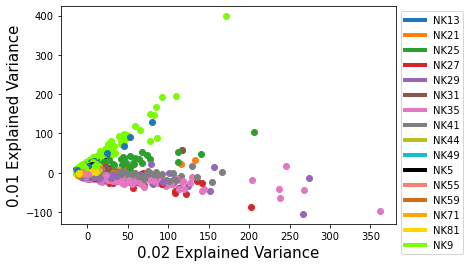

In [19]:
# Real Clusters based on metadata
PCA_cluster_plot(transform,real_labels)

Looking at the PCA biplot with the clusters for the PCA metadata, we see three interesting features of our data. 
1. First, the first two largest components that can be pulled out using PCA only capture a tiny 3% of the explained variance in the data. This may be the result of saprsity of the data, but moving forward we will need to find more appropriate forms of dimensionality reduction when working with our data. UMAPs were used previously with this data, and may provide a good starting point on how to proceed with dimentionality reduction. 
2. The next pattern of interest within this data is the lack of negative values for the first PC. Most likely this is a result of a different normalization method that does not take in to account standard deviation values. While this preserves data sparsity, this leads to a principal component that is only positive.
3. The final feature of the data that is of interest is the shape of the clusters. Based on the labeling of the points by the metadata labels, we see that instead of forming nice centroid clusters in the space of the first 2 PCs, the components are arranged into long strips that extend primarily through the first PC. This is most likely a feature of the low variance captured by PCA. This is further evidence that a different form of dimension reduction may be required for this data.

## Display Clusters

/home/sbrg/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


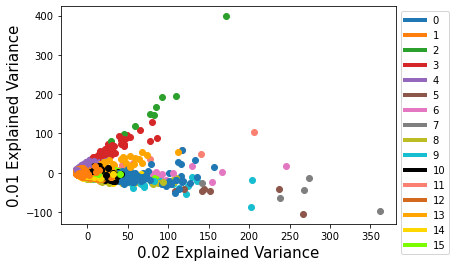

In [20]:
# Change the cluster variable with another series
PCA_cluster_plot(transform,k_clusters)

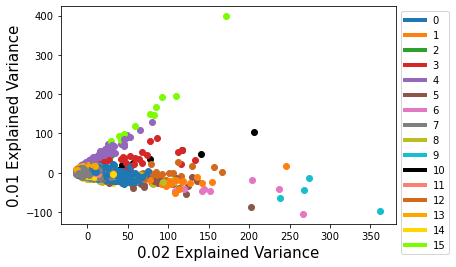

In [21]:
PCA_cluster_plot(transform,agglomerative_clusters)

In [22]:
#PCA_cluster_plot(transform,db_scan_cluster)

NameError: name 'db_scan_cluster' is not defined

Three clustering methods were performed on the original dataset: K-means, agglomerative, and DBSCANS clustering. Both K-means and agglomerative clustering produces similar results, and did a relatively good job and placing data into clusters that were similar to the original metadata labels. However, K-means clustering had some issues with splitting certain clusters along PC 1 (Cluster NK9 is a good example of this). On the other hand, Agglomerative clustering did a relatively good job at preserving the linear clusters that were present in the original metadata clusters, and thus is the preferred clustering method. Finally, DBSCANS was also performed on the data, but performed poorly. Even after modifying the parameters, the DBSCANS algorithm fails to find any clusters within the data. This may be due to the sparsity of the original dataset, and may need modifications in order to perform correctly

# Final Project Proposal



Based on our inital assesment of our data, we seek to accomplish 3 objectives as part of our final project.

1. We seek to run ICA on the full data set to parse a possible transcriptional regulatory network for human kidney tissues cells. While there may be limitations to our method due to biological differences between prokaryotes and eukaryotes, we can still compare the results of ICA with known modes of transcriptional regulation in human cells. We also seek to examine the activities obtained from ICA and how the compare between various tissue types, to examine if there are any tissue specific difference between the two datasets.

2. We seek to find better dimension reduction and visualization techniques that produces more biologically relevant clusters.

3. We seek to develop a supervised machine learning algorithm that can determine the tissue type from the UMI data

# Run ICA

In [ ]:
#from sklearn.decomposition import FastICA
#ica_transformer = FastICA(n_components=3000,random_state = 0)
#M = pd.DataFrame(ica_transformer.fit_transform(norm_data.transpose()))

In [ ]:
#M.index = data.index
#M.to_csv("S_3000.csv")

In [ ]:
#A = pd.DataFrame(ica_transformer.mixing_)
#A.index = data.columns
#A.to_csv("A_3000.csv")

In [ ]:
#ica_reconstruct =pd.DataFrame(np.matmul(M.values,A.values.transpose()),
#                              index=data.index,columns=data.columns)
#ica_reconstruct

In [ ]:
#metrics.explained_variance_score(norm_data.transpose(),ica_reconstruct)

In [ ]:
#pca.explained_variance_ratio_

In [ ]:
"""total = 0
points = []
for i in pca.explained_variance_ratio_:
    points.append(total)
    total+=i
plt.plot(points)"""